<a href="https://colab.research.google.com/github/neurontist/LangChain-for-LLM-Application-Development/blob/main/L1%20Models%20Prompts%20and%20Parsers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

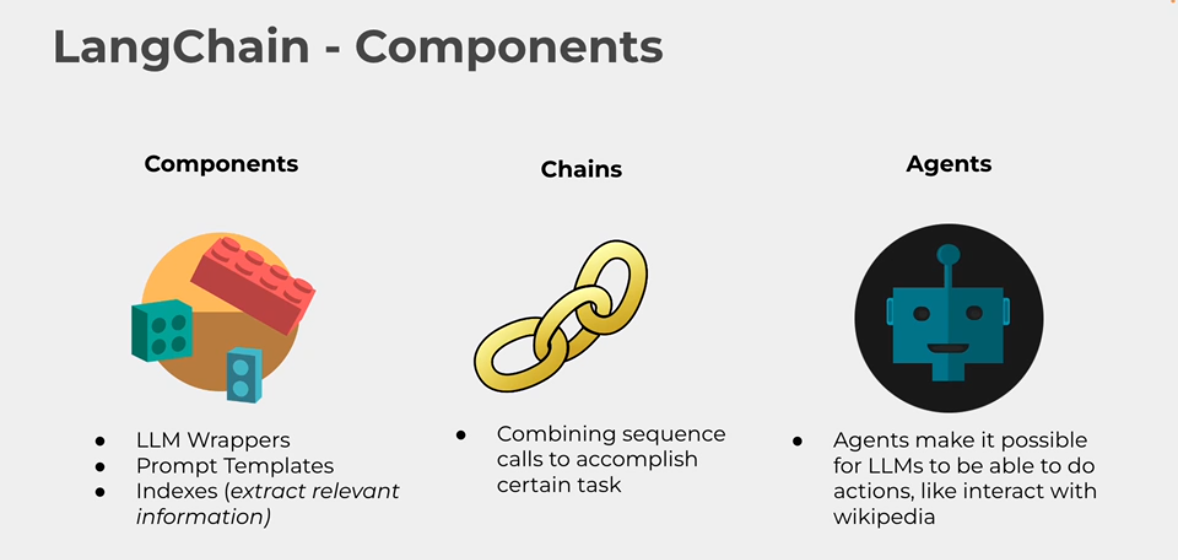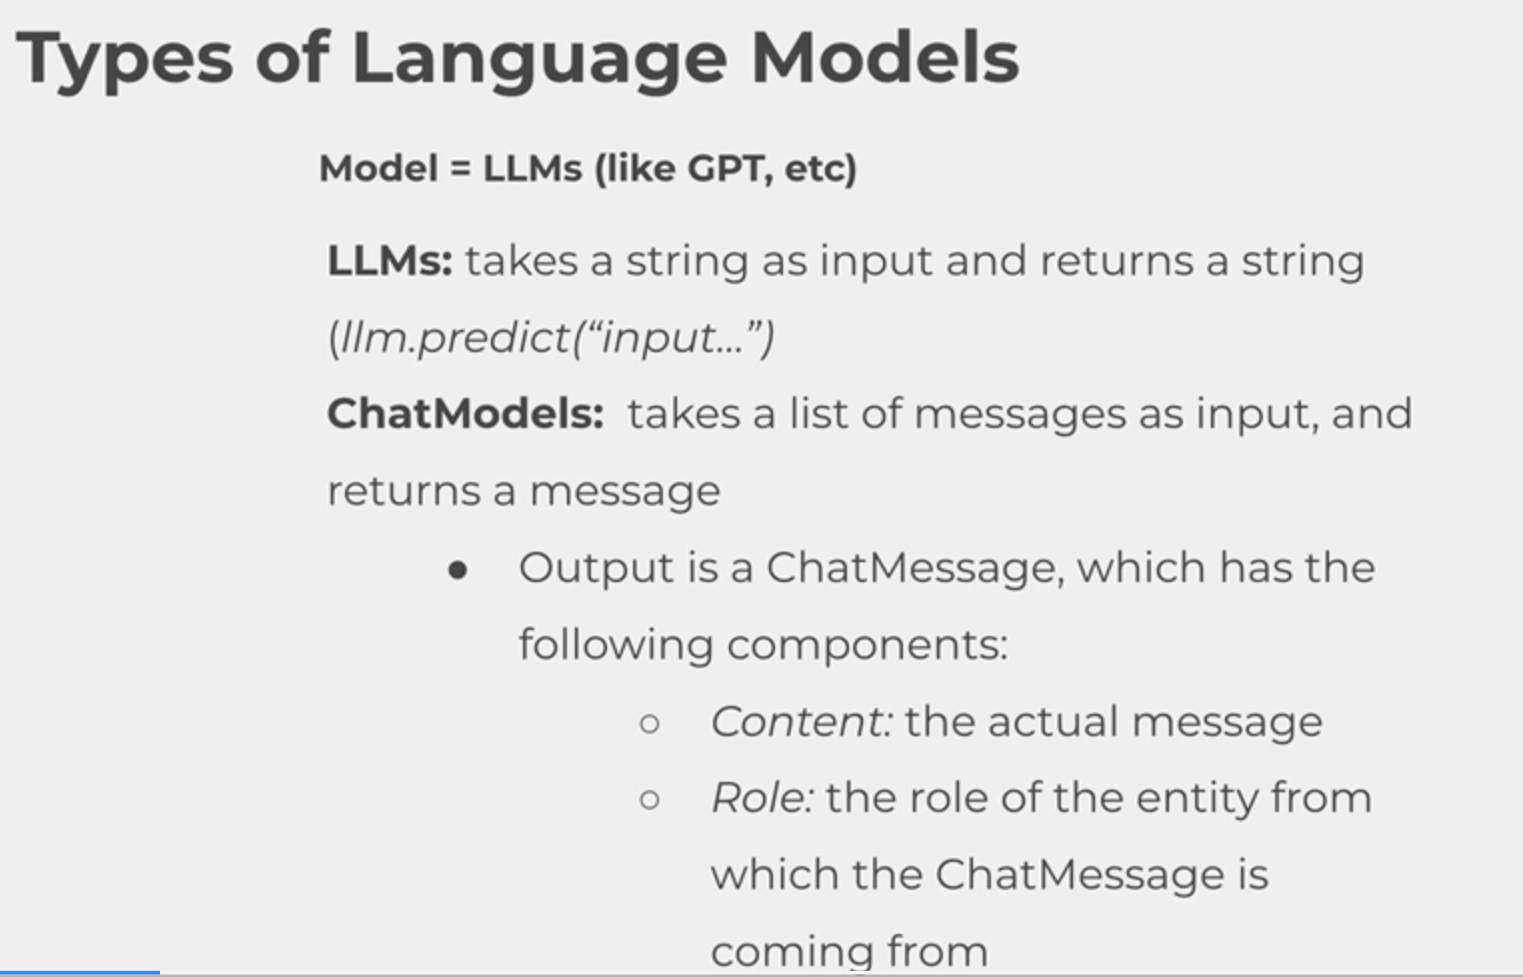

# Without Langchain

## Install

In [3]:
!pip install python-dotenv
!pip install langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.4 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


## Importing the API Key

In [4]:
import os
import google.generativeai as genai
from google.colab import userdata

genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

## Model

In [14]:
llm_model = "gemini-1.5-flash"

## Generating Content using generate_content()

In [15]:
def get_completion(prompt, model=llm_model):
    response = genai.GenerativeModel(model).generate_content(
          prompt,
          generation_config={
              "temperature": 0.0
          }
      )
    return response.text

get_completion("What is capital of India?")

'The capital of India is **New Delhi**.\n'

## Example

In [16]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse,\
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

style = """American English \
in a calm and respectful tone
"""

In [17]:
prompt = f"""Translate the text \
that is delimited by triple backticks
into a style that is {style}.
text: ```{customer_email}```
"""

print(prompt)

Translate the text that is delimited by triple backticks
into a style that is American English in a calm and respectful tone
.
text: ```
Arrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse,the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!
```



## Generating Response

In [18]:
response = get_completion(prompt)

print(response)

I'm quite upset that my blender lid came off unexpectedly, resulting in smoothie splattered on my kitchen walls.  To make matters worse, the warranty doesn't appear to cover the cost of cleaning up the mess. I would appreciate your assistance with this matter.



# Using Langchain

In [ ]:
!pip install --upgrade langchain

## Import API Key

In [1]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

## Using ChatGoogleGenerativeAI()

In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [15]:
chat = ChatGoogleGenerativeAI(model=llm_model,temperature=0.6,api_key=GOOGLE_API_KEY)

## Creating a prompt

Variable/Input is passed to the prompt inside curly brackets, like python f-string

In [16]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

### Converting the prompt to Langchain Prompt Template to work with

In [17]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)

In [18]:
customer_style = """American English \
in a calm and respectful tone
"""

customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse, \
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

### Passing the input variables to the prompt template

In [19]:
customer_messages = prompt_template.format_messages(
    style=customer_style,
    text = customer_email
)

### Generating the response

In [20]:
customer_response = chat(customer_messages)

customer_response.content

<ipython-input-20-801e952fdba5>:1: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  customer_response = chat(customer_messages)


"I'm quite upset that my blender lid came off unexpectedly, and smoothie splattered on my kitchen walls.  To add to my frustration, the warranty doesn't cover the cost of cleaning up the mess. I would appreciate your assistance with this matter."

# Output Parsers

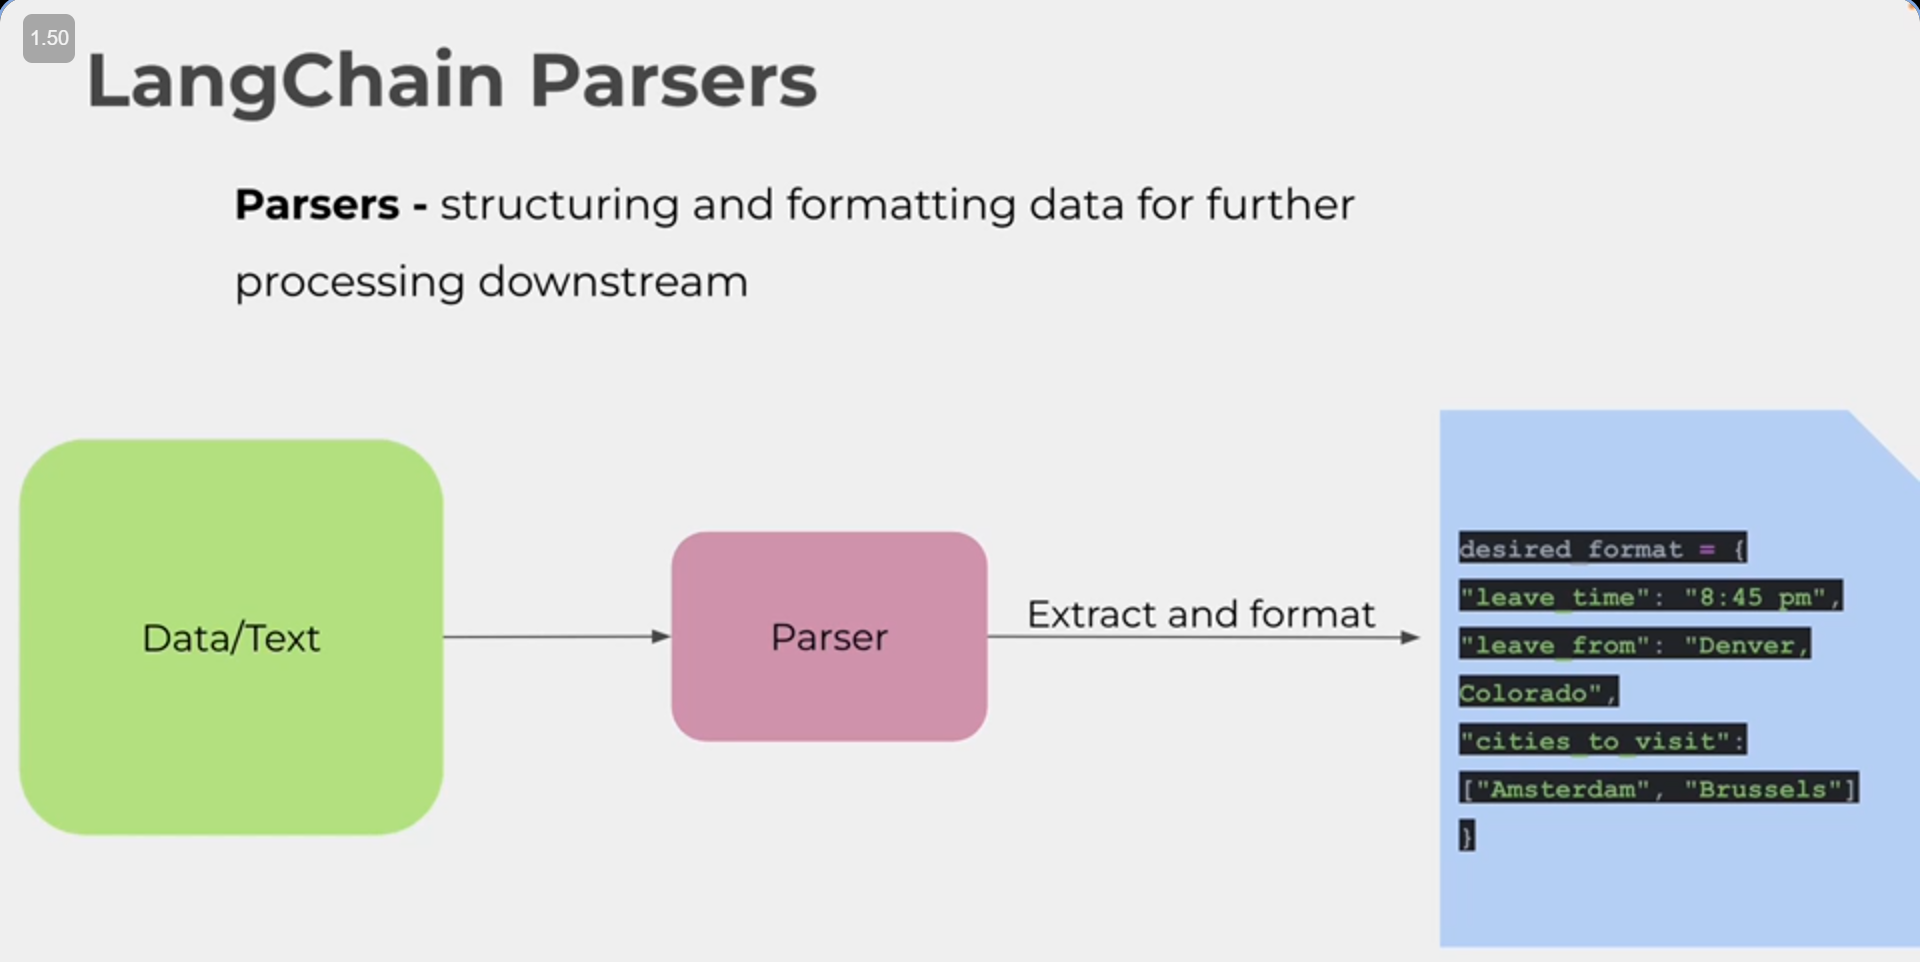

In [21]:
from langchain.prompts import ChatPromptTemplate


### Example Dictionary

In [22]:
{
  "gift": False,
  "delivery_days": 5,
  "price_value": "pretty affordable!"
}

{'gift': False, 'delivery_days': 5, 'price_value': 'pretty affordable!'}

### Customer template and the review template

In [23]:
customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""

review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

### Generating the response

In [24]:
promt_template = ChatPromptTemplate.from_template(review_template)

In [25]:
messages = prompt_template.format_messages(text=customer_review,style=None)

chat = ChatGoogleGenerativeAI(temperature=0.0, model=llm_model,api_key=GOOGLE_API_KEY)

response = chat(messages)

print(response.content)

This leaf blower is pretty amazing.  It has four settings: candle blower, gentle breeze, windy city, and tornado. It arrived in two days, just in time for my wife's anniversary present. I think my wife liked it so much she was speechless. So far I've been the only one using it, and I've been using it every other morning to clear the leaves on our lawn. It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features.


In [26]:
type(response.content)

str

In [27]:
# response.content.get('gift')

The above code line shows that the text generated by LLM is just a string and not a dictionary, we need to parse the output to achieve the result

## Parse the LLM output string into a Python dictionary

For this we need ResponseSchema and StructuredOutputParser from langchain parser

In [28]:
from langchain.output_parsers import ResponseSchema, StructuredOutputParser

### Turn the desired output vaules we are going to recieve into schemas and make a list

In [47]:
gift_schema = ResponseSchema(name="gift",
                             description="Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.")
delivery_days_schema = ResponseSchema(name="delivery_days",
                                      description="How many days did it take for the product to arrive? If this information is not found, output -1.")
price_value_schema = ResponseSchema(name="price_value",
                                    description="Extract any sentences about the value or price, and output them as a comma separated Python list.")

response_schemas = [gift_schema,
                    delivery_days_schema,
                    price_value_schema]

### Call the StructuredOutputParser

In [48]:
output = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output.get_format_instructions()

### Create Prompt Template and pass the formatted Instructions

In [49]:
review_template_2 = """
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else?
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,
and output them as a comma separated Python list.

text: {text}

{format_instructions}
"""

In [50]:
prompt = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt.format_messages(text=customer_review,
                                format_instructions=format_instructions)

In [51]:
response = chat(messages)

### Call the variable which contains our StructuredOutputParser to parse the response generated

In [52]:
output_dict = output.parse(response.content)

In [53]:
output_dict

{'gift': 'True',
 'delivery_days': '2',
 'price_value': "It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."}

In [54]:
output_dict.get('gift')

'True'

#Another Example of Output Parsing for practice

In [55]:
email_response = """
Here's our itinerary for our upcoming trip to Europe.
We leave from Denver, Colorado airport at 8:45 pm, and arrive in Amsterdam 10 hours
later at Schipol Airport.
We'll grab a ride to our Airbnb and maybe stop somewhere for breakfast before
taking a nap.

Some sightseeing will follow for a couple of hours.
We will then go shop for gifts
to bring back to our children and friends.

The next morning, at 7:45 am we'll drive to Belgium, Brussels – it should only take
a couple of hours. While in Brussels, we want to explore the city to its fullest – no rock left unturned.
"""


In [56]:
email_template = """
From the following email, extract the following information:

leave_time: when are they leaving for vacation to Europe. If there's an actual
time written, use it, if not write unknown.

leave_from: where are they leaving from, the airport or city name and state if
available.

cities_to_visit: extract the cities they are going to visit. If there are more than
one, put them in square brackets like ["cityone", "citytwo"].

Format the output as JSON with the following keys:
leave_time
leave_from
cities_to_visit

email: {email}
{format_instructions}
"""


In [57]:
from langchain.output_parsers import ResponseSchema, StructuredOutputParser
from langchain.prompts import ChatPromptTemplate

In [58]:
leave_time_schema = ResponseSchema(
    name="leave_time",
    description="when are they leaving for vacation to Europe. If there's an actual \
    time written, use it, if not write unknown."
)
leave_from_schema = ResponseSchema(
    name="leave_from",
    description="where are they leaving from, the airport or city name and state if \
    available."
)
cities_to_visit_schema = ResponseSchema(
    name="cities_to_visit",
    description="extract the cities they are going to visit. If there are more than \
    one, put them in square brackets like ['cityone', 'citytwo']."
)

response_schemas = [leave_time_schema, leave_from_schema, cities_to_visit_schema]

In [59]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output_parser.get_format_instructions()

In [60]:
prompt_template = ChatPromptTemplate.from_template(email_template)

In [61]:
format_message = prompt_template.format_messages(email=email_response,format_instructions=format_instructions)

In [64]:
response = chat.invoke(format_message)

In [65]:
print(type(response.content))

<class 'str'>


In [66]:
parsed_output = output_parser.parse(response.content)

In [67]:
type(parsed_output)

dict

In [68]:
parsed_output

{'leave_time': '8:45 pm',
 'leave_from': 'Denver, Colorado airport',
 'cities_to_visit': ['Amsterdam', 'Brussels']}

In [69]:
parsed_output.get("cities_to_visit")

['Amsterdam', 'Brussels']